In [1]:
import os
import pandas as pd

root_directory = '/Users/divya/Documents/Data_collection/train_set/'
#root_directory = '/Users/divya/Documents/Data_collection/train_set1//'

# Create an empty list to store DataFrames
dataframes = []

# Walk through the root directory and its subdirectories
for dirpath, dirnames, filenames in os.walk(root_directory):
   # if '0.default' in dirpath:
    #    continue  # Skip processing files within the '0.default' subfolder
    
    for filename in filenames:
        if filename.endswith('.csv'):
            file_path = os.path.join(dirpath, filename)
            df = pd.read_csv(file_path)  # Read each CSV file into a DataFrame
            dataframes.append(df)  # Append each DataFrame to the list

# Concatenate all DataFrames into one big DataFrame
big_dataframe = pd.concat(dataframes, ignore_index=True)

In [2]:
groups = big_dataframe.groupby('serialnumber')['participant'].first()
groups

serialnumber
457      1
458      1
459      1
460      1
461      1
        ..
5903    12
5904    12
5905    12
5906    12
5907    12
Name: participant, Length: 2622, dtype: int64

In [3]:

import os
import pandas as pd

root_directory = '/Users/divya/Documents/Data_collection/test_set/'

# Create an empty list to store DataFrames
dataframes = []

# Walk through the root directory and its subdirectories
for dirpath, dirnames, filenames in os.walk(root_directory):
  #  if '0.default' in dirpath:
   #     continue  # Skip processing files within the '0.default' subfolder
    
    for filename in filenames:
        if filename.endswith('.csv'):
            file_path = os.path.join(dirpath, filename)
            df = pd.read_csv(file_path)  # Read each CSV file into a DataFrame
            dataframes.append(df)  # Append each DataFrame to the list

# Concatenate all DataFrames into one big DataFrame
test_dataframe = pd.concat(dataframes, ignore_index=True)



In [19]:
y = big_dataframe.groupby('serialnumber')['class'].first()
y_test = test_dataframe.groupby('serialnumber')['class'].first()
y

serialnumber
457     1
458     1
459     1
460     1
461     1
       ..
5903    0
5904    0
5905    0
5906    0
5907    0
Name: class, Length: 2622, dtype: int64

In [15]:
X = big_dataframe.drop(columns=['class','orient1','orient2','orient3','participant'])
test = test_dataframe.drop(columns=['class','orient1','orient2','orient3','participant'])
test

,time,fsr1,fsr2,fsr3,fsr4,angle,accx,accy,accz,gyro1,gyro2,gyro3,acc2x,acc2y,acc2z,serialnumber
0,332737.0,42.0,18.0,1.0,1.0,2155.0,0.07,0.05,0.14,0.04,0.14,0.41,6.21,-6.91,1.24,3743
1,332957.0,45.0,13.0,1.0,0.0,2197.0,-0.53,0.07,-0.14,0.09,0.10,-0.13,5.83,-7.27,1.04,3743
2,333171.0,30.0,597.0,0.0,1.0,2137.0,-1.15,0.25,0.44,0.04,-0.04,-0.04,5.45,-6.86,1.74,3743
3,333390.0,35.0,9.0,1.0,1.0,1895.0,-3.68,3.79,-0.02,0.38,0.48,-2.77,4.92,-0.63,1.51,3743
4,333608.0,26.0,8.0,211.0,675.0,2465.0,-0.04,0.22,0.27,-0.01,0.03,-0.03,9.52,-0.92,2.07,3743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19298,750297.0,30.0,2217.0,1.0,5.0,2490.0,-0.71,-0.46,-0.12,-0.20,0.11,-0.33,2.00,-9.88,1.33,5144
19299,750517.0,43.0,1832.0,2.0,1.0,2539.0,0.05,0.09,0.03,0.06,-0.01,-0.03,2.25,-9.38,1.30,5144
19300,750735.0,22.0,1484.0,1.0,2.0,2501.0,-0.03,0.04,-0.02,0.00,-0.00,-0.05,2.28,-9.39,1.27,5144
19301,750956.0,43.0,988.0,0.0,3.0,2464.0,-0.26,-0.13,-0.09,-0.01,-0.02,-0.14,2.74,-9.51,1.21,5144


In [6]:
from tsfresh import extract_features, extract_relevant_features
# Extract features using tsfresh with the synthetic 'id' column
extracted_features = extract_relevant_features(X,y, column_id='serialnumber', column_sort='time')

Feature Extraction: 100%|███████████████████████| 20/20 [02:06<00:00,  6.33s/it]


In [7]:
extracted_features

,acc2y__ratio_beyond_r_sigma__r_2.5,gyro3__value_count__value_0,acc2y__ratio_beyond_r_sigma__r_2,acc2y__ratio_value_number_to_time_series_length,acc2y__percentage_of_reoccurring_datapoints_to_all_datapoints,acc2y__percentage_of_reoccurring_values_to_all_values,acc2y__large_standard_deviation__r_0.30000000000000004,gyro3__mean_abs_change,"gyro3__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",acc2y__sum_of_reoccurring_data_points,...,"fsr2__fft_coefficient__attr_""real""__coeff_15",gyro1__value_count__value_-1,accz__number_peaks__n_10,"fsr1__fft_coefficient__attr_""abs""__coeff_15","fsr4__fft_coefficient__attr_""real""__coeff_15",fsr2__symmetry_looking__r_0.2,fsr2__number_peaks__n_10,fsr4__large_standard_deviation__r_0.4,fsr4__number_peaks__n_10,"gyro1__fft_coefficient__attr_""imag""__coeff_15"
457,0.0,3.0,0.066667,0.933333,0.133333,0.071429,1.0,0.313571,0.313571,-15.24,...,-31.0,0.0,0.0,600.841225,-3.0,0.0,0.0,0.0,0.0,0.041942
458,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.0,0.409091,0.409091,0.00,...,-31.0,0.0,0.0,600.841225,-3.0,1.0,0.0,0.0,0.0,0.041942
459,0.0,0.0,0.125000,1.000000,0.000000,0.000000,1.0,0.237143,0.237143,0.00,...,-31.0,0.0,0.0,600.841225,-3.0,0.0,0.0,1.0,0.0,0.041942
460,0.1,1.0,0.100000,0.900000,0.200000,0.111111,0.0,0.257778,0.257778,-4.16,...,-31.0,0.0,0.0,600.841225,-3.0,1.0,0.0,0.0,0.0,0.041942
461,0.0,0.0,0.142857,1.000000,0.000000,0.000000,1.0,0.335000,0.335000,0.00,...,-31.0,0.0,0.0,600.841225,-3.0,1.0,0.0,0.0,0.0,0.041942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,0.0,0.0,0.083333,1.000000,0.000000,0.000000,1.0,0.324545,0.324545,0.00,...,-31.0,0.0,0.0,600.841225,-3.0,1.0,0.0,0.0,0.0,0.041942
5904,0.0,0.0,0.125000,1.000000,0.000000,0.000000,1.0,0.480000,0.480000,0.00,...,-31.0,0.0,0.0,600.841225,-3.0,1.0,0.0,0.0,0.0,0.041942
5905,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.0,0.410769,0.410769,0.00,...,-31.0,0.0,0.0,600.841225,-3.0,1.0,0.0,0.0,0.0,0.041942
5906,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.0,0.390455,0.390455,0.00,...,-31.0,0.0,0.0,600.841225,-3.0,1.0,0.0,0.0,0.0,0.041942


In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Assuming 'extracted_features' contains your extracted features and 'y' is your target variable

# Number of features you want to retain
num_features_to_retain = 31

# Apply mutual information feature selection
feature_selector = SelectKBest(score_func=mutual_info_regression, k=num_features_to_retain)
selected_features = feature_selector.fit_transform(extracted_features, y)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Filter the original feature names to retain only selected features
selected_feature_names = [extracted_features.columns[i] for i in selected_feature_indices]

# Create a DataFrame with the selected features
selected_features_df = extracted_features[selected_feature_names]

In [23]:
selected_features_df = selected_features_df.drop('gyro3__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"', axis=1)
selected_features_df

,gyro3__mean_abs_change,"gyro3__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",acc2x__standard_deviation,acc2x__variance,gyro3__absolute_sum_of_changes,"acc2x__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",acc2x__mean_abs_change,gyro3__cid_ce__normalize_False,"gyro3__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0","acc2y__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",...,"gyro3__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0","acc2y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0",acc2y__cid_ce__normalize_False,gyro3__maximum,gyro1__mean_n_absolute_max__number_of_maxima_7,accy__variance,accy__standard_deviation,"acc2x__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0",gyro3__absolute_maximum,"acc2y__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0"
457,0.313571,0.313571,1.913017,3.659636,4.39,0.967857,0.967857,2.241941,0.350792,1.029286,...,0.260694,2.042888,5.348131,1.36,0.084286,0.020787,0.144176,0.756345,1.37,0.983607
458,0.409091,0.409091,2.166600,4.694158,4.50,0.951818,0.951818,2.123064,0.399023,0.840000,...,0.242408,1.618498,4.398477,1.40,0.090000,0.007708,0.087793,0.990215,1.40,1.053182
459,0.237143,0.237143,0.829243,0.687644,1.66,0.502857,0.502857,1.010050,0.125335,0.671429,...,0.089506,0.665139,2.550961,0.23,0.078571,0.006494,0.080584,0.304135,1.07,0.478812
460,0.257778,0.257778,0.503548,0.253561,2.32,0.521111,0.521111,1.083790,0.120062,0.536667,...,0.064062,0.588595,2.635204,0.14,0.104286,0.019184,0.138506,0.291299,1.22,0.483578
461,0.335000,0.335000,0.730516,0.533653,2.01,0.823333,0.823333,1.188907,0.181914,0.466667,...,0.123358,0.615800,2.017375,0.28,0.127143,0.040024,0.200061,0.712689,1.40,0.460522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,0.324545,0.324545,2.978416,8.870964,3.57,1.836364,1.836364,1.400464,0.142888,0.915455,...,0.072970,1.154732,3.583867,1.33,0.210000,0.018006,0.134185,1.277841,1.35,0.329588
5904,0.480000,0.480000,2.474818,6.124723,3.36,1.387143,1.387143,1.640366,0.264882,0.745714,...,0.154000,0.721339,2.712563,1.36,0.151429,0.037911,0.194707,0.809420,1.41,0.495053
5905,0.410769,0.410769,3.254459,10.591507,5.34,1.695385,1.695385,1.774711,0.240551,0.803846,...,0.073546,1.014084,3.656870,1.47,0.192857,0.037303,0.193139,1.138179,1.47,0.382501
5906,0.390455,0.390455,2.851949,8.133616,8.59,1.485909,1.485909,2.391339,0.259059,0.856364,...,0.107477,0.962783,4.703871,1.33,0.207143,0.029306,0.171191,1.028179,1.33,0.272387


In [11]:
selected_features_df.columns
#gyro3 13
#gyro1 1
#acc2x 6
#acc2y 5
#change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0
#change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0
#mean_abs_change
#absolute_sum_of_changes
#absolute_maximum
#cid_ce__normalize_False
#root_mean_square
#abs_energy
#mean_n_absolute_max__number_of_maxima_7
#agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"
#variance
#standard_deviation


Index(['gyro3__mean_abs_change',
       'gyro3__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
       'acc2x__standard_deviation', 'acc2x__variance',
       'gyro3__absolute_sum_of_changes',
       'acc2x__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
       'acc2x__mean_abs_change', 'gyro3__cid_ce__normalize_False',
       'gyro3__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0',
       'acc2y__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
       'acc2y__mean_abs_change', 'gyro3__variance',
       'gyro3__standard_deviation', 'acc2y__variance',
       'acc2y__standard_deviation', 'gyro3__root_mean_square',
       'acc2x__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0',
       'acc2x__cid_ce__normalize_False', 'gyro3__abs_energy',
       'gyro3__mean_n_absolute_max__number_of_maxima_7',
       'gyro3__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.0',
       'acc2y__change_quantiles__f_agg_"var"__isabs_False__q

In [26]:
import re
import pandas as pd
from tsfresh.feature_extraction import feature_calculators as tsfresh_fc


def generate_code(input_string):
    # Split the string using '__' as the delimiter
    split_parts = re.split("__", input_string)
    
    # Extract relevant components
    part1 = split_parts[0]
    part2 = split_parts[1]
    
    # Initialize an empty dictionary for optional parameters
    optional_params = {}
    
    # Process optional parameters (if available)
    for part in split_parts[2:]:

        key, value = part.rsplit("_", 1)
        
        if value.isdigit():
            value = int(value)  # Convert to float if it's a number
        elif value.lower() == "true":
            value = True
        elif value.lower() == "false":
            value = False
        #if key == "f_agg":
            # Replace the second underscore with an equal sign in f_agg parameter
          #  value = f'"{value.replace("_", "=")}"'
        optional_params[key] = value
    
    # Create the code snippet
    code = (
        f"test.groupby('serialnumber')['{part1}'].apply(lambda x: "
        f"tsfresh_fc.{part2}(x, {', '.join([f'{key}={value}' for key, value in optional_params.items()])})).reset_index()"
    )
    print(code)
    
    return code

# Create an empty DataFrame to store the results
result_df = pd.DataFrame()

# Loop through the selected features
for feature in selected_features_df.columns:
    # Generate the code for the feature
    if feature == 'gyro3__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"':
        continue
    code = generate_code(feature)
    
    # Execute the code and store the result in a DataFrame
    feature_result = eval(code)
    
    # Rename the column to match the feature name
    feature_result.rename(columns={feature_result.columns[-1]: feature}, inplace=True)
    
    # Merge the result into the main DataFrame
    if result_df.empty:
        result_df = feature_result
    else:
        result_df = pd.merge(result_df, feature_result, on='serialnumber', how='inner')

# Set 'serialnumber' as the index of the result DataFrame
result_df.set_index('serialnumber', inplace=True)
result_df

test.groupby('serialnumber')['gyro3'].apply(lambda x: tsfresh_fc.mean_abs_change(x, )).reset_index()
test.groupby('serialnumber')['gyro3'].apply(lambda x: tsfresh_fc.change_quantiles(x, f_agg="mean", isabs=True, qh=1.0, ql=0.0)).reset_index()
test.groupby('serialnumber')['acc2x'].apply(lambda x: tsfresh_fc.standard_deviation(x, )).reset_index()
test.groupby('serialnumber')['acc2x'].apply(lambda x: tsfresh_fc.variance(x, )).reset_index()
test.groupby('serialnumber')['gyro3'].apply(lambda x: tsfresh_fc.absolute_sum_of_changes(x, )).reset_index()
test.groupby('serialnumber')['acc2x'].apply(lambda x: tsfresh_fc.change_quantiles(x, f_agg="mean", isabs=True, qh=1.0, ql=0.0)).reset_index()
test.groupby('serialnumber')['acc2x'].apply(lambda x: tsfresh_fc.mean_abs_change(x, )).reset_index()
test.groupby('serialnumber')['gyro3'].apply(lambda x: tsfresh_fc.cid_ce(x, normalize=False)).reset_index()
test.groupby('serialnumber')['gyro3'].apply(lambda x: tsfresh_fc.change_quantiles(x, f_agg="var", is

,gyro3__mean_abs_change,"gyro3__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",acc2x__standard_deviation,acc2x__variance,gyro3__absolute_sum_of_changes,"acc2x__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",acc2x__mean_abs_change,gyro3__cid_ce__normalize_False,"gyro3__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0","acc2y__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",...,"gyro3__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0","acc2y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0",acc2y__cid_ce__normalize_False,gyro3__maximum,gyro1__mean_n_absolute_max__number_of_maxima_7,accy__variance,accy__standard_deviation,"acc2x__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0",gyro3__absolute_maximum,"acc2y__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0"
serialnumber,,,,,,,,,,,,,,,,,,,,,
3246,0.256667,0.256667,0.773997,0.599071,3.08,0.495833,0.495833,1.390252,0.146264,0.458333,...,0.095189,0.518292,2.543973,0.46,0.140000,0.090690,0.301148,0.279624,1.46,0.329247
3247,0.205000,0.205000,0.600646,0.360776,2.87,0.431429,0.431429,1.073080,0.073760,0.284286,...,0.040225,0.255657,1.928523,0.28,0.147143,0.005873,0.076635,0.281912,1.35,0.184839
3249,0.164444,0.164444,0.657863,0.432784,1.48,0.512222,0.512222,0.764199,0.056988,0.361111,...,0.037847,0.326533,1.800361,0.26,0.088571,0.003145,0.056080,0.576351,0.88,0.229743
3250,0.185556,0.185556,1.011079,1.022281,1.67,0.617778,0.617778,0.777625,0.056965,0.440000,...,0.032758,0.493240,2.265745,0.98,0.072857,0.007745,0.088006,0.420840,0.98,0.376800
3251,0.178571,0.178571,1.579624,2.495212,2.50,0.927143,0.927143,1.280000,0.111927,0.404286,...,0.085141,0.631027,3.313518,1.68,0.088571,0.008100,0.089998,1.222963,1.68,0.620796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,0.376471,0.376471,2.991115,8.946769,6.40,1.514706,1.514706,2.254728,0.289047,0.950588,...,0.157317,1.135329,4.412550,0.96,0.090000,0.022632,0.150440,0.604296,1.17,0.241711
5954,0.377647,0.377647,3.206301,10.280369,6.42,1.249412,1.249412,1.976917,0.224574,0.859412,...,0.087277,1.008848,4.141751,1.22,0.127143,0.023451,0.153136,0.425782,1.22,0.270476
5955,0.306875,0.306875,3.002879,9.017281,4.91,1.323125,1.323125,1.889153,0.222812,0.972500,...,0.128884,1.173761,4.334097,0.95,0.137143,0.018199,0.134902,0.562484,0.95,0.228269


In [27]:
a=test.groupby('serialnumber')['gyro3'].apply(lambda x: tsfresh_fc.mean_abs_change(x, )).reset_index()
a

,serialnumber,gyro3
0,3246,0.256667
1,3247,0.205000
2,3249,0.164444
3,3250,0.185556
4,3251,0.178571
...,...,...
1543,5953,0.376471
1544,5954,0.377647
1545,5955,0.306875
1546,5956,0.297692


In [28]:
result_df

,gyro3__mean_abs_change,"gyro3__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",acc2x__standard_deviation,acc2x__variance,gyro3__absolute_sum_of_changes,"acc2x__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",acc2x__mean_abs_change,gyro3__cid_ce__normalize_False,"gyro3__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0","acc2y__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",...,"gyro3__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0","acc2y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0",acc2y__cid_ce__normalize_False,gyro3__maximum,gyro1__mean_n_absolute_max__number_of_maxima_7,accy__variance,accy__standard_deviation,"acc2x__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0",gyro3__absolute_maximum,"acc2y__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0"
serialnumber,,,,,,,,,,,,,,,,,,,,,
3246,0.256667,0.256667,0.773997,0.599071,3.08,0.495833,0.495833,1.390252,0.146264,0.458333,...,0.095189,0.518292,2.543973,0.46,0.140000,0.090690,0.301148,0.279624,1.46,0.329247
3247,0.205000,0.205000,0.600646,0.360776,2.87,0.431429,0.431429,1.073080,0.073760,0.284286,...,0.040225,0.255657,1.928523,0.28,0.147143,0.005873,0.076635,0.281912,1.35,0.184839
3249,0.164444,0.164444,0.657863,0.432784,1.48,0.512222,0.512222,0.764199,0.056988,0.361111,...,0.037847,0.326533,1.800361,0.26,0.088571,0.003145,0.056080,0.576351,0.88,0.229743
3250,0.185556,0.185556,1.011079,1.022281,1.67,0.617778,0.617778,0.777625,0.056965,0.440000,...,0.032758,0.493240,2.265745,0.98,0.072857,0.007745,0.088006,0.420840,0.98,0.376800
3251,0.178571,0.178571,1.579624,2.495212,2.50,0.927143,0.927143,1.280000,0.111927,0.404286,...,0.085141,0.631027,3.313518,1.68,0.088571,0.008100,0.089998,1.222963,1.68,0.620796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,0.376471,0.376471,2.991115,8.946769,6.40,1.514706,1.514706,2.254728,0.289047,0.950588,...,0.157317,1.135329,4.412550,0.96,0.090000,0.022632,0.150440,0.604296,1.17,0.241711
5954,0.377647,0.377647,3.206301,10.280369,6.42,1.249412,1.249412,1.976917,0.224574,0.859412,...,0.087277,1.008848,4.141751,1.22,0.127143,0.023451,0.153136,0.425782,1.22,0.270476
5955,0.306875,0.306875,3.002879,9.017281,4.91,1.323125,1.323125,1.889153,0.222812,0.972500,...,0.128884,1.173761,4.334097,0.95,0.137143,0.018199,0.134902,0.562484,0.95,0.228269


In [29]:
result_df = result_df.dropna()
y_test = y_test.loc[result_df.index]

In [30]:
X_train = selected_features_df 
y_train = y
X_test = result_df
y_test = y_test

In [31]:
y_train


serialnumber
457     1
458     1
459     1
460     1
461     1
       ..
5903    0
5904    0
5905    0
5906    0
5907    0
Name: class, Length: 2622, dtype: int64

In [32]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
print(len(y))
print(len(y_test))
#X_train- selected_features_df
#y_train- y
#X_test- result_df
#y_test -y_test

2622
1518


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score
import numpy as np
import time

# Create the DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5)

# Perform k-fold cross-validation
groups = big_dataframe.groupby('serialnumber')['participant'].first()
logo = LeaveOneGroupOut()
accuracy_scores = cross_val_score(classifier, X_train, y_train, groups=groups, cv=logo)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

print("Accuracy scores for each fold:", accuracy_scores)
print("Average Accuracy:", average_accuracy)

# Train the classifier on the entire training set (or you can use the best parameters found during cross-validation)
start_time = time.time()
classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time
print("Training time:", training_time, "seconds")

# Predict on a single instance to measure single prediction time
single_instance = X_test.iloc[[3]]  # Adjust to the instance you want to predict
start_time_single_prediction = time.time()
single_prediction = classifier.predict(single_instance)
# Calculate the single prediction time
single_prediction_time = time.time() - start_time_single_prediction
print("Single Prediction time:", single_prediction_time, "seconds")

# Predict on the test set
dt_y_pred = classifier.predict(X_test)

# Generate a classification report for the test set
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, dt_y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, dt_y_pred)
print("Classification Report:\n", report)
#Accuracy: 0.7888631090487239

Accuracy scores for each fold: [0.68928571 0.74204947 0.75945946 0.75316456 0.82336182 0.82857143
 0.83333333 0.75718016]
Average Accuracy: 0.7733007428245515
Training time: 0.025462627410888672 seconds
Single Prediction time: 0.00036215782165527344 seconds
Accuracy: 0.8280632411067194
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       225
           1       0.69      0.79      0.74       141
           2       0.86      0.69      0.76       282
           3       0.87      0.84      0.85       280
           4       0.67      0.92      0.78       272
           5       0.99      0.92      0.96       172
           6       0.94      0.68      0.79       146

    accuracy                           0.83      1518
   macro avg       0.85      0.82      0.83      1518
weighted avg       0.85      0.83      0.83      1518



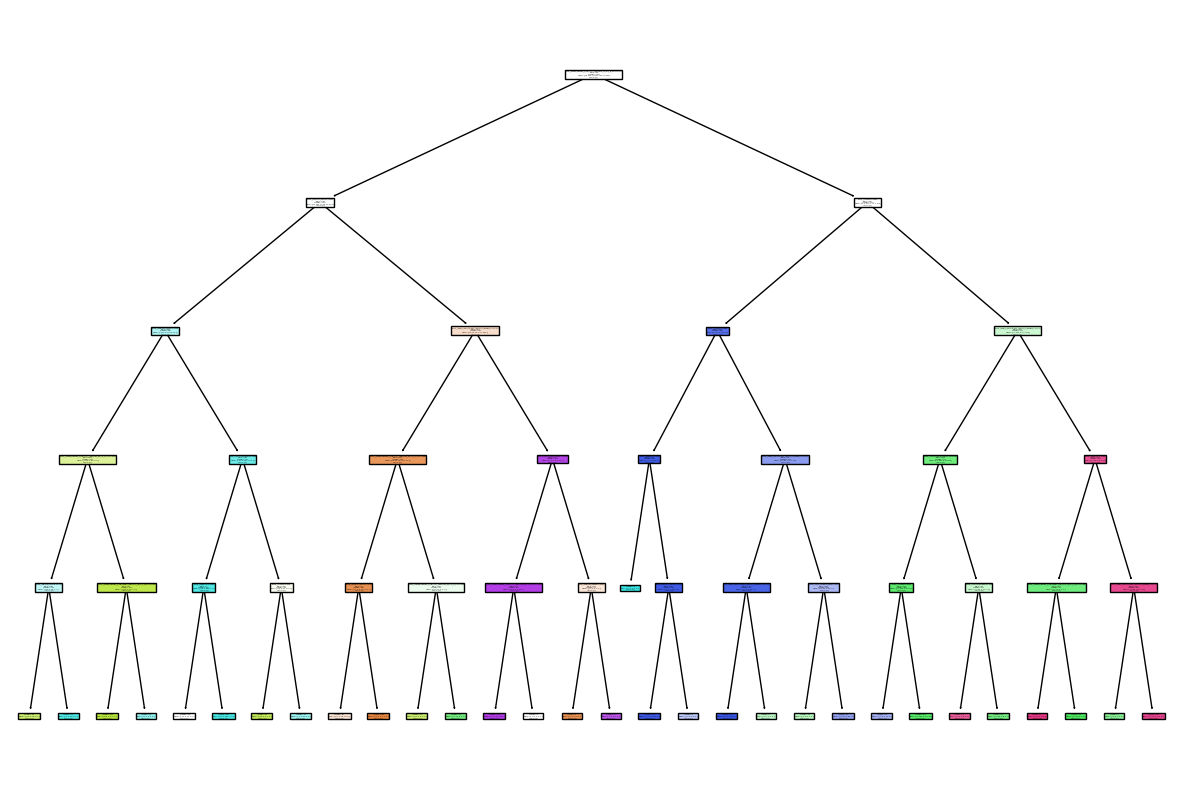

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Visualize the decision tree
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(classifier, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()

In [36]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
groups = big_dataframe.groupby('serialnumber')['participant'].first()
logo = LeaveOneGroupOut()
accuracy_scores = cross_val_score(rf_classifier, X_train, y_train, groups=groups, cv=logo)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

print("Accuracy scores for each fold:", accuracy_scores)
print("Average Accuracy:", average_accuracy)

start_time = time.time()
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time
print("Training time:", training_time, "seconds")

# Predict on a single instance to measure single prediction time
single_instance = X_test.iloc[[3]]  # Adjust to the instance you want to predict
start_time_single_prediction = time.time()
single_prediction = rf_classifier.predict(single_instance)
# Calculate the single prediction time
single_prediction_time = time.time() - start_time_single_prediction
print("Single Prediction time:", single_prediction_time, "seconds")


# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
#Average Accuracy: 0.8442015252239041

Accuracy scores for each fold: [0.74285714 0.80212014 0.88648649 0.81329114 0.86609687 0.9047619
 0.90432099 0.84073107]
Average Accuracy: 0.8450832173670084
Training time: 0.5314879417419434 seconds
Single Prediction time: 0.003364086151123047 seconds
Accuracy: 0.8675889328063241
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       225
           1       0.92      0.91      0.91       141
           2       0.87      0.71      0.78       282
           3       0.93      0.91      0.92       280
           4       0.67      0.93      0.78       272
           5       0.99      0.97      0.98       172
           6       0.97      0.69      0.81       146

    accuracy                           0.87      1518
   macro avg       0.90      0.87      0.88      1518
weighted avg       0.88      0.87      0.87      1518



In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
class_labels = ["default","stop", "speed_up", "slow_down", "change_direction", "repeat", "undo"]
# Define a mapping from numeric labels to class names
label_mapping = {
    0: "default",
    1: "stop",
    2: "speed_up",
    3: "slow_down",
    4: "change_direction",
    5: "repeat",
    6: "undo"
}

# Map the numeric labels in y_test to their corresponding names
y_test_mapped = [label_mapping[label] for label in y_test]

# Map the numeric labels in y_pred to their corresponding names
y_pred_mapped = [label_mapping[label] for label in y_pred]

# Calculate the confusion matrix with custom labels
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped, labels=class_labels)

# Create a pandas DataFrame to display the confusion matrix with custom labels
confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:\n", confusion_df)

Confusion Matrix:
                   default  stop  speed_up  slow_down  change_direction  \
default               214     0         1          6                 3   
stop                    0   128         0         13                 0   
speed_up                8     1       200          0                71   
slow_down               1    10         0        254                15   
change_direction        0     0        17          0               253   
repeat                  5     0         0          0                 0   
undo                    0     0        11          0                34   

                  repeat  undo  
default                1     0  
stop                   0     0  
speed_up               1     1  
slow_down              0     0  
change_direction       0     2  
repeat               167     0  
undo                   0   101  


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boost
gb_classifier = GradientBoostingClassifier(n_estimators=92, random_state=42)

# Perform k-fold cross-validation
groups = big_dataframe.groupby('serialnumber')['participant'].first()
logo = LeaveOneGroupOut()
accuracy_scores = cross_val_score(gb_classifier, X_train, y_train, groups=groups, cv=logo)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

print("Accuracy scores for each fold:", accuracy_scores)
print("Average Accuracy:", average_accuracy)

start_time = time.time()
# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time
print("Training time:", training_time, "seconds")

# Predict on a single instance to measure single prediction time
single_instance = X_test.iloc[[3]]  # Adjust to the instance you want to predict
start_time_single_prediction = time.time()
single_prediction = gb_classifier.predict(single_instance)
# Calculate the single prediction time
single_prediction_time = time.time() - start_time_single_prediction
print("Single Prediction time:", single_prediction_time, "seconds")

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)
#Average Accuracy: 0.8547192581990243
#Test Accuracy:0.8383604021655066

Accuracy scores for each fold: [0.76785714 0.82685512 0.8972973  0.85759494 0.86324786 0.8984127
 0.92592593 0.8537859 ]
Average Accuracy: 0.8613721111134988
Training time: 10.886329650878906 seconds
Single Prediction time: 0.0012841224670410156 seconds
Test Accuracy: 0.8675889328063241
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       225
           1       0.86      0.87      0.86       141
           2       0.87      0.72      0.79       282
           3       0.93      0.88      0.90       280
           4       0.68      0.92      0.78       272
           5       0.99      0.99      0.99       172
           6       0.95      0.72      0.82       146

    accuracy                           0.87      1518
   macro avg       0.89      0.87      0.87      1518
weighted avg       0.88      0.87      0.87      1518



In [39]:
#Bagging
from sklearn.ensemble import BaggingClassifier
#base_classifier = DecisionTreeClassifier(random_state=42)
#base_classifier = GradientBoostingClassifier(n_estimators=92, random_state=42)
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Perform k-fold cross-validation
groups = big_dataframe.groupby('serialnumber')['participant'].first()
logo = LeaveOneGroupOut()
accuracy_scores = cross_val_score(bagging_classifier, X_train, y_train, groups=groups, cv=logo)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

print("Accuracy scores for each fold:", accuracy_scores)
print("Average Accuracy:", average_accuracy)


start_time = time.time()
# Train the classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time
print("Training time:", training_time, "seconds")

# Predict on a single instance to measure single prediction time
single_instance = X_test.iloc[[3]]  # Adjust to the instance you want to predict
start_time_single_prediction = time.time()
single_prediction = bagging_classifier.predict(single_instance)
# Calculate the single prediction time
single_prediction_time = time.time() - start_time_single_prediction
print("Single Prediction time:", single_prediction_time, "seconds")

# Make predictions on the test data
y_pred = bagging_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)
#Average Accuracy: 0.8421969243436799
#Accuracy: 0.8584686774941995

Accuracy scores for each fold: [0.76785714 0.795053   0.88108108 0.80696203 0.87179487 0.9047619
 0.90432099 0.83550914]
Average Accuracy: 0.8459175194225683
Training time: 3.361591100692749 seconds
Single Prediction time: 0.02457404136657715 seconds
Accuracy: 0.8669301712779973
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       225
           1       0.93      0.89      0.91       141
           2       0.86      0.72      0.79       282
           3       0.91      0.91      0.91       280
           4       0.68      0.92      0.78       272
           5       0.99      0.98      0.99       172
           6       0.98      0.68      0.80       146

    accuracy                           0.87      1518
   macro avg       0.90      0.86      0.87      1518
weighted avg       0.88      0.87      0.87      1518



In [225]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

#base_classifier = DecisionTreeClassifier(random_state=42)
#80% accuracy
#base_classifier = GradientBoostingClassifier(n_estimators=92, random_state=42)
#77% accuracy
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a BaggingClassifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Perform k-fold cross-validation
groups = big_dataframe.groupby('serialnumber')['participant'].first()
logo = LeaveOneGroupOut()
accuracy_scores = cross_val_score(adaboost_classifier, X_train, y_train, groups=groups, cv=logo)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

print("Accuracy scores for each fold:", accuracy_scores)
print("Average Accuracy:", average_accuracy)


start_time = time.time()
# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time
print("Training time:", training_time, "seconds")

# Predict on a single instance to measure single prediction time
single_instance = X_test.iloc[[3]]  # Adjust to the instance you want to predict
start_time_single_prediction = time.time()
single_prediction = adaboost_classifier.predict(single_instance)
# Calculate the single prediction time
single_prediction_time = time.time() - start_time_single_prediction
print("Single Prediction time:", single_prediction_time, "seconds")

# Make predictions on the test data
y_pred = adaboost_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)
#Accuracy: 0.8468677494199536

Accuracy scores for each fold: [0.66785714 0.72791519 0.83783784 0.78164557 0.81766382 0.81587302
 0.88271605 0.78328982]
Average Accuracy: 0.7893498056016811
Training time: 0.5898969173431396 seconds
Single Prediction time: 0.003676891326904297 seconds
Accuracy: 0.7964426877470355
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       225
           1       0.89      0.87      0.88       141
           2       0.86      0.70      0.77       282
           3       0.90      0.88      0.89       280
           4       0.66      0.92      0.77       272
           5       0.69      0.73      0.71       172
           6       0.96      0.70      0.81       146

    accuracy                           0.80      1518
   macro avg       0.82      0.79      0.80      1518
weighted avg       0.81      0.80      0.80      1518



In [226]:
#SVM 
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)


# Perform k-fold cross-validation
groups = big_dataframe.groupby('serialnumber')['participant'].first()
logo = LeaveOneGroupOut()
accuracy_scores = cross_val_score(svm_classifier, X_train, y_train, groups=groups, cv=logo)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

print("Accuracy scores for each fold:", accuracy_scores)
print("Average Accuracy:", average_accuracy)

start_time = time.time()
# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time
print("Training time:", training_time, "seconds")

# Predict on a single instance to measure single prediction time
single_instance = X_test.iloc[[3]]  # Adjust to the instance you want to predict
start_time_single_prediction = time.time()
single_prediction = svm_classifier.predict(single_instance)
# Calculate the single prediction time
single_prediction_time = time.time() - start_time_single_prediction
print("Single Prediction time:", single_prediction_time, "seconds")

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
#Accuracy: 0.831399845320959


Accuracy scores for each fold: [0.69285714 0.69611307 0.84594595 0.79746835 0.88603989 0.8031746
 0.85493827 0.8537859 ]
Average Accuracy: 0.8037903973801416
Training time: 0.14374804496765137 seconds
Single Prediction time: 0.00040602684020996094 seconds
Accuracy: 0.7687747035573123
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       225
           1       0.77      0.85      0.81       141
           2       0.84      0.71      0.77       282
           3       0.90      0.82      0.86       280
           4       0.68      0.91      0.78       272
           5       0.60      0.77      0.67       172
           6       0.93      0.66      0.78       146

    accuracy                           0.77      1518
   macro avg       0.79      0.76      0.77      1518
weighted avg       0.79      0.77      0.77      1518



In [227]:
#k-nearest neighbours KNN
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Perform k-fold cross-validation
groups = big_dataframe.groupby('serialnumber')['participant'].first()
logo = LeaveOneGroupOut()
accuracy_scores = cross_val_score(knn_classifier, X_train, y_train, groups=groups, cv=logo)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

print("Accuracy scores for each fold:", accuracy_scores)
print("Average Accuracy:", average_accuracy)

start_time = time.time()
# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time
print("Training time:", training_time, "seconds")

# Predict on a single instance to measure single prediction time
single_instance = X_test.iloc[[3]]  # Adjust to the instance you want to predict
start_time_single_prediction = time.time()
single_prediction = knn_classifier.predict(single_instance)
# Calculate the single prediction time
single_prediction_time = time.time() - start_time_single_prediction
print("Single Prediction time:", single_prediction_time, "seconds")

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
#Accuracy: 0.7834493426140758

Accuracy scores for each fold: [0.68214286 0.65371025 0.74864865 0.74683544 0.8034188  0.76190476
 0.79012346 0.62924282]
Average Accuracy: 0.7270033797670419
Training time: 0.0007352828979492188 seconds
Single Prediction time: 0.0020160675048828125 seconds
Accuracy: 0.7127799736495388
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       225
           1       0.72      0.84      0.78       141
           2       0.68      0.69      0.69       282
           3       0.88      0.79      0.84       280
           4       0.70      0.77      0.73       272
           5       0.53      0.58      0.56       172
           6       0.94      0.58      0.71       146

    accuracy                           0.71      1518
   macro avg       0.73      0.70      0.71      1518
weighted avg       0.73      0.71      0.71      1518



In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 80, 100],
    'max_depth': [None, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best classifier and best parameters
best_rf_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Perform k-fold cross-validation
groups = big_dataframe.groupby('serialnumber')['participant'].first()
logo = LeaveOneGroupOut()
accuracy_scores = cross_val_score(best_rf_classifier, X_train, y_train, groups=groups, cv=logo)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

print("Best Parameters:", best_params)
print("Accuracy scores for each fold:", accuracy_scores)
print("Average Accuracy:", average_accuracy)

# Train the best classifier on the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Calculate the accuracy of the best classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report for the test set
report = classification_report(y_test, y_pred)
print("Best Random Forest Classifier's Classification Report:\n", report)
#Accuracy: 0.8476411446249034

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy scores for each fold: [0.74285714 0.795053   0.91351351 0.83227848 0.86597938 0.90793651
 0.91049383 0.84384384]
Average Accuracy: 0.8514944626626285
Accuracy: 0.8627311522048364
Best Random Forest Classifier's Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       113
           1       0.91      0.87      0.89       141
           2       0.88      0.73      0.80       282
           3       0.93      0.90      0.92       280
           4       0.68      0.93      0.79       272
           5       0.98      0.98      0.98       172
           6       0.96      0.71      0.81       146

    accuracy                           0.86      1406
   macro avg       0.90      0.87      0.88      1406
weighted avg       0.88      0.86      0.86      1406



In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
class_labels = ["stop", "speed_up", "slow_down", "change_direction", "repeat", "undo"]
# Define a mapping from numeric labels to class names
label_mapping = {
    1: "stop",
    2: "speed_up",
    3: "slow_down",
    4: "change_direction",
    5: "repeat",
    6: "undo"
}

# Map the numeric labels in y_test to their corresponding names
y_test_mapped = [label_mapping[label] for label in y_test]

# Map the numeric labels in y_pred to their corresponding names
y_pred_mapped = [label_mapping[label] for label in y_pred]

# Calculate the confusion matrix with custom labels
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped, labels=class_labels)

# Create a pandas DataFrame to display the confusion matrix with custom labels
confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:\n", confusion_df)

KeyError: 0

In [40]:
import joblib

# Assuming 'rf_classifier' is your trained Random Forest classifier


# Save the trained model to a file
joblib.dump(bagging_classifier, 'bagging.joblib')

['bagging.joblib']

In [42]:
loaded_rf_classifier = joblib.load('bagging.joblib')
predictions = loaded_rf_classifier.predict(result_df)
predictions

array([1, 1, 1, ..., 0, 0, 0])

In [1]:
import sklearn

print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.3.2
